# Final Project
This project is about cleaning and exploration of data that was obtained from a  2018 Kaggle Machine Learning & Data Science Survey. The dataset used is based on data obtained from Kaggle. The datasets are inform of an excel file containing responses from the survey and a copy of a json file containing the original questions of the survey. 

## Data Sources
In the project, we'll load our first data set from a local excel file from our computer and a json file containing questionsof the respondent of the survey.


The datasets are based on data from:
>>
https://www.kaggle.com/code/sudhirnl7/data-science-survey-2018/data?select=multipleChoiceResponses.csv

## 1. Load Datasets

But, first let's setup our environment by importing the necessary libraries and modules:

In [122]:
import  os
#import gdown
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 


In [123]:
pwd = os.getcwd()

Now let's load our first dataset:

In [124]:
def load_dataset():
    """ 
    Loads datasets from various sources to DataFrames
    Return 2 dataframes
    """
    raw_responses = pd.read_excel("multipleChoiceResponses.xlsx")
    raw_questions = pd.read_json("multipleChoiceQuestions.json")
    return raw_responses, raw_questions


In [125]:
raw_responses, raw_questions = load_dataset()

In [126]:
responses = raw_responses.copy().reset_index(drop=True)
questions = raw_questions.copy()

## 2. Data Cleaning and Inspection

In [97]:
# responses.drop(columns="Time from Start to Finish (seconds)")
responses.head()

,Respondent ID,Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,1,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,2,Male,-1,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,3,Female,-1,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,4,Male,-1,35-39,United States of America,Master's degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
4,5,Male,-1,22-24,India,Master's degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1


In [98]:
responses.shape

(23859, 395)

Since our two datasets are not aligned along the same axes, we'll first **Transpose** the responses dataset before concatinating it with the **Questions** dataset and then realigning it for further processing and Manipulation as well as visualization later.

In [99]:
# Transpose the responses dataset to align it with the questions dataset
responses_reshaped = pd.DataFrame(data=responses).T
responses_reshaped = responses_reshaped.reset_index(drop=True)
responses_reshaped.head()

,0,1,2,3,4,5,6,7,8,9,...,23849,23850,23851,23852,23853,23854,23855,23856,23857,23858
0,1,2,3,4,5,6,7,8,9,10,...,23850,23851,23852,23853,23854,23855,23856,23857,23858,23859
1,Female,Male,Female,Male,Male,Male,Male,Male,Male,Male,...,Female,Male,Female,Female,Male,Male,Female,Male,Male,Male
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,45-49,30-34,30-34,35-39,22-24,25-29,35-39,18-21,25-29,30-34,...,18-21,22-24,18-21,30-34,30-34,45-49,25-29,22-24,25-29,25-29
4,United States of America,Indonesia,United States of America,United States of America,India,Colombia,Chile,India,Turkey,Hungary,...,India,Turkey,Turkey,Turkey,Turkey,France,Turkey,Turkey,United Kingdom of Great Britain and Northern I...,Spain


After the **Transpose**, we'll concatenate the two datasets along axis = 1

In [100]:
#concat the two datasets
dataset_merged = pd.concat([questions, responses_reshaped], axis= 1)
dataset_merged

,Questions,0,1,2,3,4,5,6,7,8,...,23849,23850,23851,23852,23853,23854,23855,23856,23857,23858
0,Respondent ID,1,2,3,4,5,6,7,8,9,...,23850,23851,23852,23853,23854,23855,23856,23857,23858,23859
1,What is your gender? - Selected Choice,Female,Male,Female,Male,Male,Male,Male,Male,Male,...,Female,Male,Female,Female,Male,Male,Female,Male,Male,Male
2,What is your gender? - Prefer to self-describe...,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,What is your age (# years)?,45-49,30-34,30-34,35-39,22-24,25-29,35-39,18-21,25-29,...,18-21,22-24,18-21,30-34,30-34,45-49,25-29,22-24,25-29,25-29
4,In which country do you currently reside?,United States of America,Indonesia,United States of America,United States of America,India,Colombia,Chile,India,Turkey,...,India,Turkey,Turkey,Turkey,Turkey,France,Turkey,Turkey,United Kingdom of Great Britain and Northern I...,Spain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,What barriers prevent you from making your wor...,NaN,NaN,NaN,Not enough incentives to share my work,Not enough incentives to share my work,NaN,NaN,Not enough incentives to share my work,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,What barriers prevent you from making your wor...,NaN,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,I had never considered making my work easier f...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392,What barriers prevent you from making your wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,What barriers prevent you from making your wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We'll again Transpose the merged dataset to align it to the proper orientation for easy cleansing, inspection, manipulation and visualization

In [101]:
# Realign the merged dataset
dataset_reshaped = pd.DataFrame(data=dataset_merged).T 
dataset_reshaped.reset_index(drop=True, inplace=True)
dataset_reshaped

,0,1,2,3,4,5,6,7,8,9,...,385,386,387,388,389,390,391,392,393,394
0,Respondent ID,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,...,What tools and methods do you use to make your...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...
1,1,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,2,Male,-1,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,3,Female,-1,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,4,Male,-1,35-39,United States of America,Master's degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,23855,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23856,23856,Female,-1,25-29,Turkey,Master's degree,Engineering (non-computer focused),NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23857,23857,Male,-1,22-24,Turkey,Master's degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
23858,23858,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1


First, we are going to see some demographic insights of the dataset we are dealing with. For this purpose we'll use the first 13 columns of the data.

In [102]:
# Slice the dataset to obtain the demographic information of the dataset

dataset_demo = dataset_reshaped.loc[:, :12]
dataset_demo

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Respondent ID,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...
1,1,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,0,NaN,NaN
2,2,Male,-1,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,-1,2022-10-05 00:00:00,"10-20,000"
3,3,Female,-1,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,-1,0-1,"0-10,000"
4,4,Male,-1,35-39,United States of America,Master's degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23855,23855,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,-1,2022-10-05 00:00:00,"250-300,000"
23856,23856,Female,-1,25-29,Turkey,Master's degree,Engineering (non-computer focused),NaN,-1,NaN,-1,NaN,NaN
23857,23857,Male,-1,22-24,Turkey,Master's degree,"Computer science (software engineering, etc.)",Software Engineer,-1,Computers/Technology,-1,0-1,"10-20,000"
23858,23858,Male,-1,25-29,United Kingdom of Great Britain and Northern I...,NaN,NaN,NaN,-1,NaN,-1,NaN,NaN


In [103]:
# Drops NaN values from the dataset

def remove_nan(df):
    """ 
    Takes in the DF as a parameter and drops all values that are NAN
    Return DF without NAN
    """ 
    return df.dropna()


In [104]:
dataset_demo_clean = remove_nan(dataset_demo)
dataset_demo_clean

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Respondent ID,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...
2,2,Male,-1,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,-1,2022-10-05 00:00:00,"10-20,000"
3,3,Female,-1,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,-1,0-1,"0-10,000"
5,5,Male,-1,22-24,India,Master's degree,Mathematics or statistics,Data Analyst,-1,I am a student,-1,0-1,"0-10,000"
6,6,Male,-1,25-29,Colombia,Bachelor's degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,-1,0-1,I do not wish to disclose my approximate yearl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23848,23848,Male,-1,40-44,Germany,Master's degree,"Computer science (software engineering, etc.)",Consultant,-1,Shipping/Transportation,-1,2015-10-01 00:00:00,I do not wish to disclose my approximate yearl...
23850,23850,Female,-1,18-21,India,Master's degree,"Computer science (software engineering, etc.)",Data Analyst,-1,I am a student,-1,2022-02-01 00:00:00,I do not wish to disclose my approximate yearl...
23854,23854,Male,-1,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,-1,Academics/Education,-1,2022-10-05 00:00:00,"10-20,000"
23855,23855,Male,-1,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,-1,Computers/Technology,-1,2022-10-05 00:00:00,"250-300,000"


We'll further drop some columns as per of the data cleaning process.

In [105]:
dataset_demo_clean.drop(columns=[2, 8, 10], inplace=True)
dataset_demo_clean


/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,3,4,5,6,7,9,11,12
0,Respondent ID,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...
2,2,Male,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,2022-10-05 00:00:00,"10-20,000"
3,3,Female,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,5,Male,22-24,India,Master's degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"
6,6,Male,25-29,Colombia,Bachelor's degree,Physics or astronomy,Data Scientist,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...
...,...,...,...,...,...,...,...,...,...,...
23848,23848,Male,40-44,Germany,Master's degree,"Computer science (software engineering, etc.)",Consultant,Shipping/Transportation,2015-10-01 00:00:00,I do not wish to disclose my approximate yearl...
23850,23850,Female,18-21,India,Master's degree,"Computer science (software engineering, etc.)",Data Analyst,I am a student,2022-02-01 00:00:00,I do not wish to disclose my approximate yearl...
23854,23854,Male,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,Academics/Education,2022-10-05 00:00:00,"10-20,000"
23855,23855,Male,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,Computers/Technology,2022-10-05 00:00:00,"250-300,000"


For great insights we'll rename some of the columns 

In [106]:
dataset_demo_clean.rename(columns={0:"Respondent ID", 1:"Gender", 3:"Age", 4:"Country of Residence", 5:"Level of Education", 6:"Undergraduate Major", 7:"Current Role", 9:"Employment Status",
                        11:"Experience", 12:"Yearly Compensation"}, inplace=True)
dataset_demo_clean

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Respondent ID,Gender,Age,Country of Residence,Level of Education,Undergraduate Major,Current Role,Employment Status,Experience,Yearly Compensation
0,Respondent ID,What is your gender? - Selected Choice,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...
2,2,Male,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,2022-10-05 00:00:00,"10-20,000"
3,3,Female,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,5,Male,22-24,India,Master's degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"
6,6,Male,25-29,Colombia,Bachelor's degree,Physics or astronomy,Data Scientist,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...
...,...,...,...,...,...,...,...,...,...,...
23848,23848,Male,40-44,Germany,Master's degree,"Computer science (software engineering, etc.)",Consultant,Shipping/Transportation,2015-10-01 00:00:00,I do not wish to disclose my approximate yearl...
23850,23850,Female,18-21,India,Master's degree,"Computer science (software engineering, etc.)",Data Analyst,I am a student,2022-02-01 00:00:00,I do not wish to disclose my approximate yearl...
23854,23854,Male,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,Academics/Education,2022-10-05 00:00:00,"10-20,000"
23855,23855,Male,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,Computers/Technology,2022-10-05 00:00:00,"250-300,000"


In [107]:
dataset_demo_clean1 = dataset_demo_clean.drop([0], axis=0)


In [108]:
dataset_demo_clean1

,Respondent ID,Gender,Age,Country of Residence,Level of Education,Undergraduate Major,Current Role,Employment Status,Experience,Yearly Compensation
2,2,Male,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,2022-10-05 00:00:00,"10-20,000"
3,3,Female,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000"
5,5,Male,22-24,India,Master's degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000"
6,6,Male,25-29,Colombia,Bachelor's degree,Physics or astronomy,Data Scientist,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...
7,7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,2015-10-01 00:00:00,"10-20,000"
...,...,...,...,...,...,...,...,...,...,...
23848,23848,Male,40-44,Germany,Master's degree,"Computer science (software engineering, etc.)",Consultant,Shipping/Transportation,2015-10-01 00:00:00,I do not wish to disclose my approximate yearl...
23850,23850,Female,18-21,India,Master's degree,"Computer science (software engineering, etc.)",Data Analyst,I am a student,2022-02-01 00:00:00,I do not wish to disclose my approximate yearl...
23854,23854,Male,30-34,Turkey,Doctoral degree,"Computer science (software engineering, etc.)",Research Assistant,Academics/Education,2022-10-05 00:00:00,"10-20,000"
23855,23855,Male,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,Computers/Technology,2022-10-05 00:00:00,"250-300,000"


## 3. Manipulation and Visualization
In this section, we'll begin by analyzing the demographic details of the respondent who took part in the survey and draw some interesting insight and at the same time develop some visualizations which go hand in hand with the insights. Every insight is best visualized using a well curated plot and for each visualization, we'll make some meaning deductions from the logics drawn from the plots. This deductions will form part of the problem applicability and conclusions adapted from the survey data.

In [109]:
# Function to find the top 20 countries where most respondents reside in 
def topcountries():
    topcountries_df = pd.DataFrame(dataset_demo_clean1.groupby("Country of Residence")["Respondent ID"].count().sort_values(ascending=False).head(20))
    topcountries_df.reset_index(inplace=True)
    topcountries_df.rename(columns={"Country of Residence":"Country", "Respondent ID":"Number of Respondents"}, inplace=True)

    return topcountries_df

top_res = topcountries()


In [110]:
# This function plots horizontal bar graphs to show insights of our dataset

def plots(df, x_axis, y_axis):
    """ 
    Takes in  3 inputs as parameters and returns a barplot using the seaborn library
    """ 
    sns.set_theme(style="dark", context="talk")
    sns.color_palette("dark")
    return sns.barplot(data=df, x=x_axis, y=y_axis)

Text(0.5, 0, 'Number of Respondents')

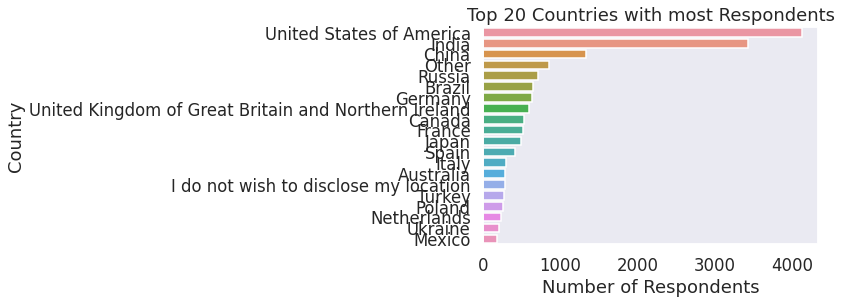

In [130]:
# Top 20 Countries Vs Respondents

viz1 = plots(top_res, "Number of Respondents", "Country")
viz1.set_title('Top 20 Countries with most Respondents')
viz1.set_ylabel('Country')
viz1.set_xlabel('Number of Respondents')


The plot depicts that most respondents of the survey are from USA and closely followed by India and China a further third. The data however may show some biasness as to the country of residence of the respondents. An explanation to this may be because most respondent who took part in the survey are from USA and India.

In [112]:
# Number of respondents according to the highest level of education
def topcountries():
    topcountries_df = pd.DataFrame(dataset_demo_clean1.groupby(["Level of Education"])["Respondent ID"].count().sort_values(ascending=False))
    topcountries_df.reset_index(inplace=True)
    topcountries_df.rename(columns={"Respondent ID":"Number of Respondents"}, inplace=True)

    return topcountries_df

highest_level_of_education = topcountries()


Text(0.5, 0, 'Number of Respondents')

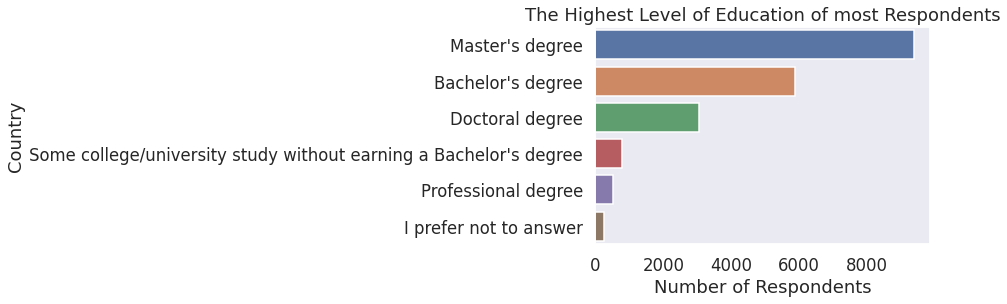

In [113]:
viz2 = plots(highest_level_of_education, "Number of Respondents", "Level of Education")
viz2.set_title('The Highest Level of Education of most Respondents')
viz2.set_ylabel('Country')
viz2.set_xlabel('Number of Respondents')


The above plot shows that most respondent who took part in the survey had either a Master's or Bachelor's degree of some kind as their highest level of education. Those with a Doctoral degree came in a distant third. A small number however did not prefer saying their highest level of education.

In [114]:
# Number of respondents according to the current role of the respondent as per the top 4 counrties with the most respondents
def topcountries():
    topcountries_df = pd.DataFrame(dataset_demo_clean1.groupby(["Current Role"])["Respondent ID"].count().sort_values(ascending=False)).head(20)
    topcountries_df.reset_index(inplace=True)
    topcountries_df.rename(columns={"Respondent ID":"Number of Respondents"}, inplace=True)

    return topcountries_df

current_role = topcountries()

Text(0.5, 0, 'Number of Respondents')

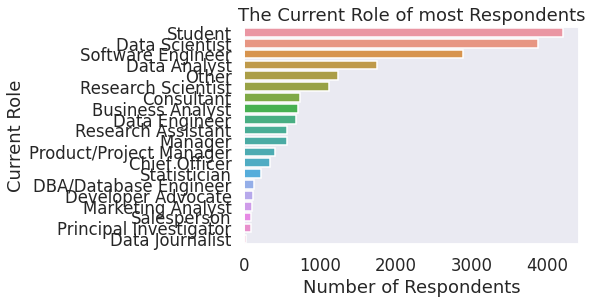

In [115]:
viz3 = plots(current_role, "Number of Respondents", "Current Role")
viz3.set_title('The Current Role of most Respondents')
viz3.set_ylabel('Current Role')
viz3.set_xlabel('Number of Respondents')

It seems that most respondents who took part in the study were currently studying. Professionals like Data Scientist, Software Engineers and Data Analysts also took part in the stud in large numbers respectively.

In [116]:
## Comparison of respondents based on their Gender
# Number of respondents according to the current role of the respondent as per the top 4 counrties with the most respondents
def topcountries():
    topcountries_df = pd.DataFrame(dataset_demo_clean1.groupby(["Gender"])["Respondent ID"].count().sort_values(ascending=False))
    topcountries_df.reset_index(inplace=True)
    topcountries_df.rename(columns={"Respondent ID":"Number of Respondents"}, inplace=True)

    return topcountries_df

gender_gap = topcountries()
gender_gap

,Gender,Number of Respondents
0,Male,16372
1,Female,3202
2,Prefer not to say,235
3,Prefer to self-describe,68


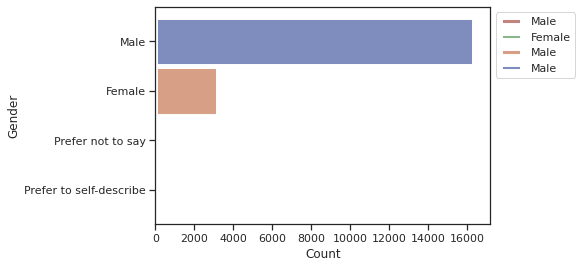

In [117]:
sns.set_theme(style="ticks")
sns.histplot(data=dataset_demo_clean1, y="Gender", hue="Gender", palette='dark')
plt.legend(labels=dataset_demo_clean1["Gender"], loc = 2, bbox_to_anchor = (1,1))


The results of the survey however depicts a very wide gap between the Male and Female participants. It is safe to deduce that more than 75% of the respondent were male, representing a very wide gender gap in the Tech industry. A small number however chose either not to say their sexual alignment or to self describe.

Apart from the Demographic Insights of this dataset, we would also like to explore other interesting details about this dataset. For this purpose, we would examine relating to the most preferred statistical tools used by most respondents


In [118]:
# Top Tools used by Most Respondents
#                     
top_tools = dataset_reshaped.loc[1:, 22] # Columns 22 has responses to the Question: What is the primary tool that you use at work or school to analyze data?

top_tools = pd.concat([dataset_demo_clean1, top_tools], axis=1)
top_tools.rename(columns={22:"Top Statistical Tools"}, inplace=True)
top_tools

,Respondent ID,Gender,Age,Country of Residence,Level of Education,Undergraduate Major,Current Role,Employment Status,Experience,Yearly Compensation,Top Statistical Tools
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Cloud-based data software & APIs (AWS, GCP, Az..."
2,2,Male,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,2022-10-05 00:00:00,"10-20,000","Basic statistical software (Microsoft Excel, G..."
3,3,Female,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",Local or hosted development environments (RStu...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Local or hosted development environments (RStu...
5,5,Male,22-24,India,Master's degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000","Advanced statistical software (SPSS, SAS, etc.)"
...,...,...,...,...,...,...,...,...,...,...,...
23855,23855,Male,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,Computers/Technology,2022-10-05 00:00:00,"250-300,000",Local or hosted development environments (RStu...
23856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23857,23857,Male,22-24,Turkey,Master's degree,"Computer science (software engineering, etc.)",Software Engineer,Computers/Technology,0-1,"10-20,000",Local or hosted development environments (RStu...
23858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
top_tools_clean = remove_nan(top_tools)
top_tools_clean

,Respondent ID,Gender,Age,Country of Residence,Level of Education,Undergraduate Major,Current Role,Employment Status,Experience,Yearly Compensation,Top Statistical Tools
2,2,Male,30-34,Indonesia,Bachelor's degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,2022-10-05 00:00:00,"10-20,000","Basic statistical software (Microsoft Excel, G..."
3,3,Female,30-34,United States of America,Master's degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",Local or hosted development environments (RStu...
5,5,Male,22-24,India,Master's degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000","Advanced statistical software (SPSS, SAS, etc.)"
6,6,Male,25-29,Colombia,Bachelor's degree,Physics or astronomy,Data Scientist,Computers/Technology,0-1,I do not wish to disclose my approximate yearl...,Local or hosted development environments (RStu...
7,7,Male,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,2015-10-01 00:00:00,"10-20,000","Basic statistical software (Microsoft Excel, G..."
...,...,...,...,...,...,...,...,...,...,...,...
23842,23842,Male,18-21,Russia,Master's degree,"Computer science (software engineering, etc.)",Student,I am a student,0-1,"0-10,000",Local or hosted development environments (RStu...
23844,23844,Male,30-34,Netherlands,Master's degree,"Computer science (software engineering, etc.)",Software Engineer,Computers/Technology,2015-10-01 00:00:00,"90-100,000",Local or hosted development environments (RStu...
23850,23850,Female,18-21,India,Master's degree,"Computer science (software engineering, etc.)",Data Analyst,I am a student,2022-02-01 00:00:00,I do not wish to disclose my approximate yearl...,Local or hosted development environments (RStu...
23855,23855,Male,45-49,France,Doctoral degree,"Computer science (software engineering, etc.)",Chief Officer,Computers/Technology,2022-10-05 00:00:00,"250-300,000",Local or hosted development environments (RStu...


In [120]:
# respondents =  respondents.groupby("Question")["Respondent ID"].nunique().reset_index()
top_tools_merged = pd.DataFrame(top_tools_clean.groupby(["Top Statistical Tools"])["Respondent ID"].count().sort_values(ascending=False))
top_tools_merged.rename(columns={"Respondent ID":"No of Respondents"}, inplace=True)
top_tools_merged


,No of Respondents
Top Statistical Tools,
"Local or hosted development environments (RStudio, JupyterLab, etc.)",8680
"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",3493
Other,1580
"Advanced statistical software (SPSS, SAS, etc.)",1327
"Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",1271
"Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",1079


With students being the majority respondents of the survey, it is clear that 'Local or hosted development environments' made the most preferred statistical tool used. This may be due to the high cost associated with setting up and acquiring sophisticated developmnet tools such as BI software and cloud-based data software and APIs. Basic statistical software such as Microsoft Excel and Google Sheets are also widely used by most respondents of the study.